# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

## Scoping

It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

D:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [3]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [9]:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [16]:
observations.park_name.nunique()

4

In [21]:
print(f"number of observed national parks {observations.park_name.nunique()}")
print(f"observed national parks {observations.park_name.unique()}")

number of observed national parks 4
observed national parks ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [4]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [22]:
print("Amount of different categories {}".format(species.category.nunique()))
print("different categories {}".format(species.category.unique()))

Amount of different categories 7
different categories ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [40]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [24]:
print(f"number of different species: {species.scientific_name.nunique()}")

number of different species: 5541


category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

#### Species conservation status

In [35]:
print(f"different conservation status: {species.conservation_status.nunique()}")
print(f"name of different conservation status: {species.conservation_status.unique()}")

different conservation status: 4
name of different conservation status: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


as we can see the column conservation_status contains null values which need to be filled.

In [32]:
species.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

only 191 rows have no null values out of 5824 rows in the species dataframe 

In [37]:
species.groupby('conservation_status').size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [26]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

### Analysis

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `least-concern`, which describes that a species is plenty full in the wild and are  not being a focus of species conservation. [1]

In [45]:
species.fillna('least-concern', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
Species of Concern     161
Threatened              10
least-concern         5633
dtype: int64

##### Endagered Species

now we want to see if any species is more endagered than an other one

In [62]:
conservation_animals = species[species.conservation_status!='least-concern'].groupby(['conservation_status','category'])\
                        ['scientific_name'].count().unstack()

In [70]:
conservation_animals

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


In [86]:
conservation_animals.head()

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of species')

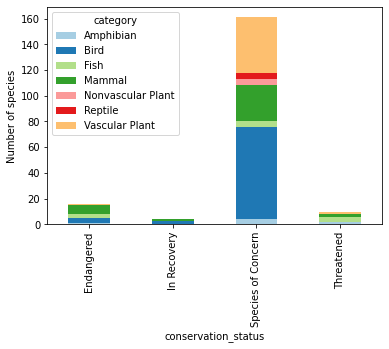

In [91]:
col = sns.color_palette("Paired", 11)

ax = conservation_animals.plot(kind="bar",color=col, stacked=True)
ax.set_xlabel("conservation_status")
ax.set_ylabel("Number of species")

#### Findings conservation status

Endangered: Birds and Mamals are most endangered with 4 and 7 species
In Recovery: only three Bird species and 1 mamal are in recovery
Species of Concern: 72 Birds, 43 vascular plants* and 28 mamals are species of concern
Threatened: 4 fish species, 2 mamals, amphibians and vascular plants are threatened



*Vascular Plant are any plants that are "vascular tissue" which are made up of xylem and phloem tissues.
Those tissues carry minerals, nutrients and water through the plant.
The attached picture shows an example for vascular and non-vascular plants.
Non-vascular plants can be mosses. Vascular plants include leaf plants like trees or farns. [2] 

<br>


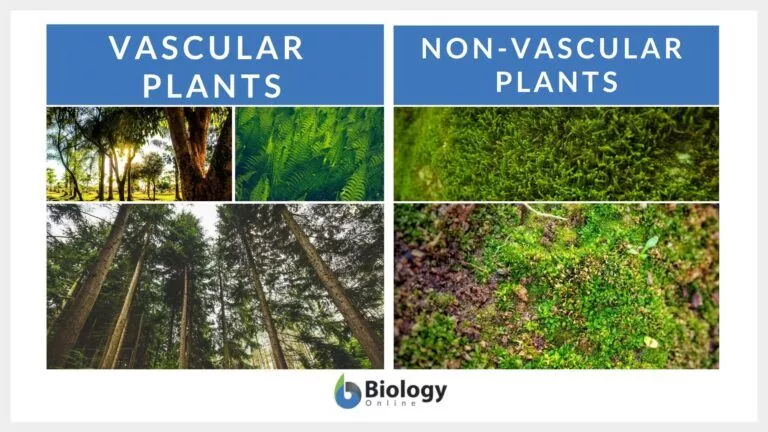

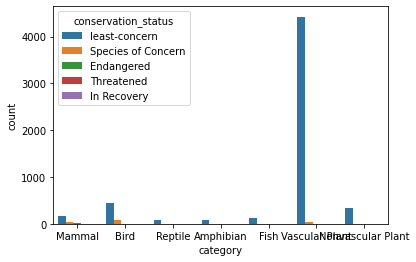

In [50]:
sns.countplot(x ='category', hue = "conservation_status", data = species)

plt.show()

In [47]:
species['is_protected'] = species.conservation_status != 'least_concern'

In [49]:
species['is_protected'].value_counts()

True    5824
Name: is_protected, dtype: int64

### Join both dataframes

joining observations with species 

In [5]:
df_new = pd.merge(observations, species, how='inner')

In [6]:
df_new.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN


## Sources

[1] [Least-concern_species](https://en.wikipedia.org/wiki/Least-concern_species) <br>
[2] [biology_online](https://www.biologyonline.com/dictionary/vascular-plants)